# Curso Introducción al Procesamiento de Lenguaje Natural
# Taller 1

# Integrantes: Dayana Gonzalez y Luna Duran
# Tema: Preprocesamiento

**Resultados de aprendizaje**

- Aplicar los conceptos abordados en clase sobre fundamentos de PLN.

- Utilizar softwar especializado para preprocesamiento de texto.



## Librerias

In [47]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator 
from stop_words import get_stop_words
from nltk.corpus import gutenberg
import nltk # para hacer procesamiento y tokenizar (ingles)
nltk.download('punkt')
import spacy #para tagging (español)
from collections import Counter
from urllib.request import urlopen
from bs4 import BeautifulSoup
from PIL import Image, ImageOps

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Indicaciones

- Los siguientes puntos se realizaran en grupos de dos integrantes.

- El día 24 de febrero se avanzará como trabajo en clase y se subirá a la plataforma los avances. Esa será una primera nota de trabajo en clase.

- La segunda parte debe ser cargada en la plataforma hasta el día martes 28 de febrero en la noche. 

- Guardar el archivo como .pdf y cargarlo a la plataforma.


# Punto 1


1. Importar y leer la base de tweets:  *tweets_politica.csv*

In [49]:
tweets = pd.read_csv('/content/tweets_politica.csv', sep= '::::')
tweets.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,cuenta,partido,timestamp,tweet
0,populares,pp,1.556863e+09,El Partido Popular siempre con la libertad. Ta...
1,populares,pp,1.556856e+09,🌞 ¡Buenos días y #FelizViernes!Esta es nuestra...
2,populares,pp,1.556819e+09,📻 @IdiazAyuso: “Con @populares hemos convertid...
3,populares,pp,1.556813e+09,📻 @IdiazAyuso es entrevistada en @encasadeherr...
4,populares,pp,1.556804e+09,"👉 Como prometimos, @populares acaba con el enc..."


2. Agregar al data.frame que se obtiene una columna que cuente los carcteres de cada tweet.

In [50]:
tweets.tweet

0         El Partido Popular siempre con la libertad. Ta...
1         🌞 ¡Buenos días y #FelizViernes!Esta es nuestra...
2         📻 @IdiazAyuso: “Con @populares hemos convertid...
3         📻 @IdiazAyuso es entrevistada en @encasadeherr...
4         👉 Como prometimos, @populares acaba con el enc...
                                ...                        
175337    El trabajo serio y valiente que está realizand...
175338    Luz de luna, Cita a ciegas, La jungla y mucho ...
175339    @InCicloVeritas @Fundeu Cervantes en este caso...
175340    @InCicloVeritas No es la app; es la @Fundeu. P...
175341    "España ha cumplido; cumpla usted con España"....
Name: tweet, Length: 175342, dtype: object

In [51]:
list_tweet = []
for i in range(len(tweets.tweet)):
    if ((tweets.tweet[i]) != None):
        list_tweet.append(len(tweets.tweet[i]))
    elif ((tweets.tweet[i]) == None):
        list_tweet.append(0)


tweets.insert(loc=len(tweets.columns), column='num_charters', value= list_tweet)



In [52]:
tweets.head()

,cuenta,partido,timestamp,tweet,num_charters
0,populares,pp,1.556863e+09,El Partido Popular siempre con la libertad. Ta...,100
1,populares,pp,1.556856e+09,🌞 ¡Buenos días y #FelizViernes!Esta es nuestra...,121
2,populares,pp,1.556819e+09,📻 @IdiazAyuso: “Con @populares hemos convertid...,188
3,populares,pp,1.556813e+09,📻 @IdiazAyuso es entrevistada en @encasadeherr...,117
4,populares,pp,1.556804e+09,"👉 Como prometimos, @populares acaba con el enc...",144


3. Tomar las primeras 500 filas de la variable ":tweet" y dar respuesta a los siguientes items.


In [53]:
tweets_500 = tweets.iloc[: 500]

In [54]:
#lista de todos los arrobas de los tweets
list_arr =[]
for i in range(500):
    arr = re.findall(r'(?<=@)\w+', tweets.tweet[i])
    list_arr.extend(arr)

print(list_arr)

['IdiazAyuso', 'populares', 'encasadeherrero', 'IdiazAyuso', 'encasadeherrero', 'esRadio', 'populares', 'pablocasado_', 'populares', 'pablocasado_', 'IdiazAyuso', 'AlmeidaPP_', 'pablocasado_', 'cucagamarra', 'EspejoPublico', 'AlmeidaPP_', 'ppmadrid', 'Desayunos_tve', 'AlmeidaPP_', 'Desayunos_tve', 'ALevySoler', 'elprogramadear', 'ALevySoler', 'elprogramadear', 'cucagamarra', 'EspejoPublico', 'IdiazAyuso', 'HoyPorHoy', 'AlmeidaPP_', 'Desayunos_tve', 'ALevySoler', 'elprogramadear', 'IdiazAyuso', 'HoyPorHoy', 'IdiazAyuso', 'MasDeUno', 'IdiazAyuso', 'MasDeUno', 'alferma1', 'LasMananas_rne', 'alferma1', 'cayetanaAT', 'HerreraenCOPE', 'cayetanaAT', 'HerreraenCOPE', 'cayetanaAT', 'HerreraenCOPE', 'cayetanaAT', 'HerreraenCOPE', 'cayetanaAT', 'carlosherreracr', 'HerreraenCOPE', 'tejerinapp', 'tejerinapp', 'tejerinapp', 'BrujulaOndaCero', 'cucagamarra', 'cucagamarra', 'cucagamarra', 'encasadeherrero', 'esRadio', 'pablocasado_', 'pablocasado_', 'pablocasado_', 'pablocasado_', 'pablocasado_', 'tej

In [55]:
frecuencias= {}
for arr in list_arr:
    if arr in frecuencias:
        frecuencias[arr] +=1
    else:
        frecuencias[arr]=1

print(frecuencias)

{'IdiazAyuso': 8, 'populares': 7, 'encasadeherrero': 3, 'esRadio': 2, 'pablocasado_': 48, 'AlmeidaPP_': 5, 'cucagamarra': 9, 'EspejoPublico': 8, 'ppmadrid': 1, 'Desayunos_tve': 11, 'ALevySoler': 3, 'elprogramadear': 10, 'HoyPorHoy': 6, 'MasDeUno': 2, 'alferma1': 2, 'LasMananas_rne': 7, 'cayetanaAT': 14, 'HerreraenCOPE': 9, 'carlosherreracr': 1, 'tejerinapp': 4, 'BrujulaOndaCero': 1, 'telediario_tve': 5, 'TeoGarciaEgea': 18, 'JavierMaroto': 4, 'DebatAlRojoVivo': 8, 'isabelbonig': 4, 'BelenHoyo': 3, 'mjosecatala': 3, 'pablocasado': 1, 'JavieraMaroto': 1, 'eslamananadeFJL': 3, 'jesusmartinb': 1, 'abalosmeco': 35, 'xabierfortes': 2, 'BeatrizCorredor': 7, 's': 4, 'fpabloiglesias': 2, 'PSOECanarias': 1, 'PES_PSE': 1, 'conJoseMFranco': 2, 'sanchezcastejon': 9, 'el_pais': 1, 'equipoGabilondo': 1, 'pepu_alcalde': 1, 'CelaaIsabel': 4, 'Adrilastra': 3, 'elcomerciodigit': 1, 'santicl': 7, 'radioeuskadi': 7, 'mavichina': 1, 'carmencalvo_': 11, 'CristinaNarbona': 6, 'angelgarridog': 7, 'ignacioaguad

 + Realice una tabla de frecuencia, un gráfico de barras y un gráfico de líneas del top 20 de las personas que más publican. Analizar los gráficos y responder: ¿cuáles son las 5 cuentas que más tweets publican en ese conjunto de los 500 datos?


In [56]:
df= pd.DataFrame([[key, frecuencias[key]] for key in frecuencias.keys()], columns= ['usuario', 'frecuencia'])
df = df.sort_values('frecuencia', inplace =False, ascending=False)
df_20 = df.iloc[:20]


In [57]:
#tabla de frecuencia
df_20

,usuario,frecuencia
4,pablocasado_,48
122,Pablo_Iglesias_,37
32,abalosmeco,35
59,Albert_Rivera,18
22,TeoGarciaEgea,18
64,Congreso_Es,17
16,cayetanaAT,14
91,InesArrimadas,14
50,carmencalvo_,11
9,Desayunos_tve,11


In [58]:
#grafica de barras
px.bar(x= df_20.usuario, y=df_20.frecuencia)

In [59]:
#grafica de linea
px.line(df_20, x='usuario', y= 'frecuencia')


Los 5 usuarios que mas referencian en nuestro conjunto de 500 tweets son:

In [60]:
df_20.head()

,usuario,frecuencia
4,pablocasado_,48
122,Pablo_Iglesias_,37
32,abalosmeco,35
59,Albert_Rivera,18
22,TeoGarciaEgea,18


 + Repita el punto anterior con la totalidad de los tweets y graficando el top 20.

In [61]:
#lista de todos los arrobas de los tweets
list_arr =[]
for i in range(len(tweets.tweet)):
    if ((tweets.tweet[i]) != None):
        arr = re.findall(r'(?<=@)\w+', tweets.tweet[i])
        list_arr.extend(arr)

#print(list_arr)

In [62]:
frecuencias= {}
for arr in list_arr:
    if arr in frecuencias:
        frecuencias[arr] +=1
    else:
        frecuencias[arr]=1

#print(frecuencias)

In [63]:
df= pd.DataFrame([[key, frecuencias[key]] for key in frecuencias.keys()], columns= ['usuario', 'frecuencia'])
df = df.sort_values('frecuencia', inplace =False, ascending=False)
df_20 = df.iloc[:20]

In [64]:
#tabla de frecuencia
df_20

,usuario,frecuencia
40,sanchezcastejon,4586
4,pablocasado_,3369
91,InesArrimadas,2568
233,BalEdmundo,1641
555,Santi_ABASCAL,1434
1,populares,1354
64,Congreso_Es,1352
804,vox_es,1291
45,Adrilastra,1273
157,PSOE,1249


In [65]:
#grafica de barras
px.bar(x= df_20.usuario, y=df_20.frecuencia)

In [66]:
#grafica de linea
px.line(df_20, x='usuario', y= 'frecuencia')


In [67]:
df_20.head()

,usuario,frecuencia
40,sanchezcastejon,4586
4,pablocasado_,3369
91,InesArrimadas,2568
233,BalEdmundo,1641
555,Santi_ABASCAL,1434


 + Haga una nube de palabras donde se muestre el hashtag más posteado en los 500 tweets. ¿Cuántas veces fue posteado en los 500 tweets y en la base total?

In [68]:
#lista de todos los hashtags de los tweets
list_hash =[]
for i in range(500):
    hash = re.findall(r'(?<=#)\w+', tweets.tweet[i])
    list_hash.extend(hash)

print(len(list_hash))

525


In [69]:
frecuencias= {}
for hash in list_hash:
    if hash in frecuencias:
        frecuencias[hash] +=1
    else:
        frecuencias[hash]=1

print(frecuencias)
len(frecuencias)

{'LibertadDePrensa': 3, 'FelizViernes': 1, '2DeMayo': 3, '2deMayo': 4, 'TejerinaEnOndaCero': 2, 'TejerinaEnOndaCeroSíguela': 1, 'EsHerrero': 2, '28A': 24, 'España': 7, 'ÚLTIMAHORA': 1, 'EleccionesGenerales28A': 16, 'MásPPMásEspaña': 7, 'VotaPP': 36, 'ElVotoQueNosUne': 15, 'ValorSeguro': 31, 'ElVotoSeUne': 3, 'FinCampañaESP': 5, 'CasadoConFJL': 3, 'CMIN': 1, 'DíaConvenciónDiscapacidadRecordar': 1, 'PGE2019': 1, 'LosDesayunos': 6, 'AcosoEscolar': 1, 'StopBullying': 2, '140AñosPSOE': 16, 'estabilidad': 1, 'progreso': 1, 'igualdad': 2, 'PSOE': 21, '140añosPSOE': 2, 'ComunidadDeMadrid': 1, '2demayo': 3, 'libertad': 1, 'justiciasocial': 1, '140AniversarioPSOE': 1, '1demayo': 5, 'DíadelTrabajador': 1, 'Madrid': 1, 'derechossociales': 2, 'derechoslaborales': 2, 'PrimeroLasPersonas': 4, 'DíadelTrabajo': 3, 'DiaDelTrabajador': 2, '1Mayo': 2, 'CMin': 5, '28ALa': 1, 'HicisteisQuePasara': 37, '26M': 4, 'PP': 1, 'Cs': 1, 'EnDirecto': 4, 'Ferraz': 3, 'ElDíaDespuésARV': 5, 'Constitución': 1, '28APSOE'

94

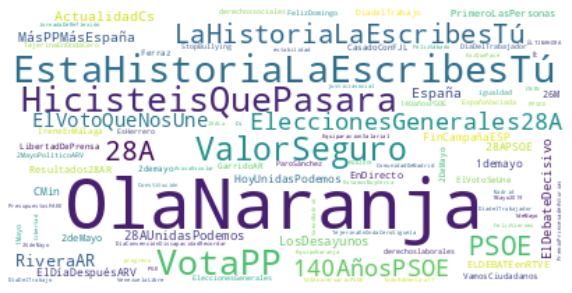

In [70]:
wordCloud= WordCloud(max_font_size=50, max_words=90, background_color='white').generate_from_frequencies(frecuencias)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud_1.jpg', bbox_inches='tight', dpi= 400)
plt.show()

 + Guarde la imagen en .png o .jpg para y cárguela en la carpeta

Esto se hizo en el codigo anterior con la funcion plt.savefig()

- ¿Se puede cambiar la forma de la nube de palabras a una imagen personalizada?


Si, es posible usando una foto formato PNG que contenga la silueta que queremos usar como contenedor para nuestra nube de palabras, ademas de usar la libreria PIL. A continuacion vamos a mostrar un ejemplo.

In [71]:


elen_mask = np.array(Image.open('/content/elefante.jpg'))
elen_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

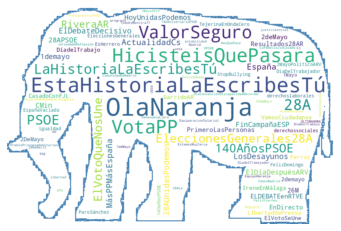

In [72]:
wc = WordCloud(background_color="white", max_words=2000, mask=elen_mask, contour_width=3, contour_color='steelblue')
# generate word cloud
wc.generate_from_frequencies(frecuencias)

plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_elefant_2.jpg', bbox_inches='tight', dpi= 400)
plt.show()

# Punto 2. Preprocesamiento de texto


## 1. Importar el archivo .txt:  *Cien_años_GGM.txt* (fragmento de cien años de soledad)



In [73]:
#abrir archivo de texto
text = open('/content/Cien_años_GGM.txt', encoding='utf-8').read()

oraciones = text.split(".")

In [74]:
text = re.sub('\n',  '',  text)           # borramos los saltos de linea dados por '\n'
text = re.sub('Cien años de soledad Gabriel García Márquez',  '',  text)     # en el texto esta 3 veces en medio del texto por lo que lo removemos 
text = re.sub('\\\\',  '',  text)     # hay algunos en medio del texto 
text = re.sub('$$',  '',  text)     # hay algunos en medio del texto 

In [75]:
text

'Gabriel García Márquez Cien años de soledad EDITADO POR "EDICIONES LA CUEVA" Para J omi García Ascot y María Luisa Elio  Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarías con el dedo. Todos los años, por el mes de marzo, una familia de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de barba montaraz y manos de gorrión, que se presentó con el nombre de Melquíades, hizo una truculenta demostración pública de lo que

   + Convertir todo el texto a minúscula

In [76]:
text_l = text.lower()
text_l

'gabriel garcía márquez cien años de soledad editado por "ediciones la cueva" para j omi garcía ascot y maría luisa elio  muchos años después, frente al pelotón de fusilamiento, el coronel aureliano buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos. el mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarías con el dedo. todos los años, por el mes de marzo, una familia de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos. primero llevaron el imán. un gitano corpulento, de barba montaraz y manos de gorrión, que se presentó con el nombre de melquíades, hizo una truculenta demostración pública de lo que

+ Conservar solo palabras


In [77]:
palabras = re.sub ("[^A-Za-z0-9óáéíúñ]+",' ',text_l) 
palabras

'gabriel garcía márquez cien años de soledad editado por ediciones la cueva para j omi garcía ascot y maría luisa elio muchos años después frente al pelotón de fusilamiento el coronel aureliano buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas blancas y enormes como huevos prehistóricos el mundo era tan reciente que muchas cosas carecían de nombre y para mencionarlas había que señalarías con el dedo todos los años por el mes de marzo una familia de gitanos desarrapados plantaba su carpa cerca de la aldea y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos primero llevaron el imán un gitano corpulento de barba montaraz y manos de gorrión que se presentó con el nombre de melquíades hizo una truculenta demostración pública de lo que él mismo llamaba l

   + Crear una función para quitar tildes
   

In [78]:
def quitar_tildes(text):
    text = text.replace('á', 'a') #remover á
    text = text.replace("é", "e") #remover é
    text = text.replace("í", "i") #remover í
    text = text.replace("ó", "o") #remover ó
    text = text.replace("ú", "u") #remover ú
    return text

In [79]:
sin_tildes = quitar_tildes(palabras)
sin_tildes

'gabriel garcia marquez cien años de soledad editado por ediciones la cueva para j omi garcia ascot y maria luisa elio muchos años despues frente al peloton de fusilamiento el coronel aureliano buendia habia de recordar aquella tarde remota en que su padre lo llevo a conocer el hielo macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un rio de aguas diafanas que se precipitaban por un lecho de piedras pulidas blancas y enormes como huevos prehistoricos el mundo era tan reciente que muchas cosas carecian de nombre y para mencionarlas habia que señalarias con el dedo todos los años por el mes de marzo una familia de gitanos desarrapados plantaba su carpa cerca de la aldea y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos primero llevaron el iman un gitano corpulento de barba montaraz y manos de gorrion que se presento con el nombre de melquiades hizo una truculenta demostracion publica de lo que el mismo llamaba l

+ Tokenizar

In [80]:
#tokenizar la cadena de texto en palabras, sin signos de puntuacion
tokens = nltk.word_tokenize(sin_tildes)
tokens

['gabriel',
 'garcia',
 'marquez',
 'cien',
 'años',
 'de',
 'soledad',
 'editado',
 'por',
 'ediciones',
 'la',
 'cueva',
 'para',
 'j',
 'omi',
 'garcia',
 'ascot',
 'y',
 'maria',
 'luisa',
 'elio',
 'muchos',
 'años',
 'despues',
 'frente',
 'al',
 'peloton',
 'de',
 'fusilamiento',
 'el',
 'coronel',
 'aureliano',
 'buendia',
 'habia',
 'de',
 'recordar',
 'aquella',
 'tarde',
 'remota',
 'en',
 'que',
 'su',
 'padre',
 'lo',
 'llevo',
 'a',
 'conocer',
 'el',
 'hielo',
 'macondo',
 'era',
 'entonces',
 'una',
 'aldea',
 'de',
 'veinte',
 'casas',
 'de',
 'barro',
 'y',
 'cañabrava',
 'construidas',
 'a',
 'la',
 'orilla',
 'de',
 'un',
 'rio',
 'de',
 'aguas',
 'diafanas',
 'que',
 'se',
 'precipitaban',
 'por',
 'un',
 'lecho',
 'de',
 'piedras',
 'pulidas',
 'blancas',
 'y',
 'enormes',
 'como',
 'huevos',
 'prehistoricos',
 'el',
 'mundo',
 'era',
 'tan',
 'reciente',
 'que',
 'muchas',
 'cosas',
 'carecian',
 'de',
 'nombre',
 'y',
 'para',
 'mencionarlas',
 'habia',
 'que',


 + Quitar las stop.words ¿Cuáles son las 10 palabras más usadas y que no son de parada?
   

In [81]:
stop_words=get_stop_words("es") #stop words en español
palabras_no_stop = [palabras for palabras in tokens if len(palabras.lower())>1 and (palabras.lower() not in stop_words)]
palabras_no_stop #texto sin palabras stop.words

['gabriel',
 'garcia',
 'marquez',
 'cien',
 'años',
 'soledad',
 'editado',
 'ediciones',
 'cueva',
 'omi',
 'garcia',
 'ascot',
 'maria',
 'luisa',
 'elio',
 'años',
 'despues',
 'frente',
 'peloton',
 'fusilamiento',
 'coronel',
 'aureliano',
 'buendia',
 'habia',
 'recordar',
 'aquella',
 'tarde',
 'remota',
 'padre',
 'llevo',
 'conocer',
 'hielo',
 'macondo',
 'entonces',
 'aldea',
 'veinte',
 'casas',
 'barro',
 'cañabrava',
 'construidas',
 'orilla',
 'rio',
 'aguas',
 'diafanas',
 'precipitaban',
 'lecho',
 'piedras',
 'pulidas',
 'blancas',
 'enormes',
 'huevos',
 'prehistoricos',
 'mundo',
 'tan',
 'reciente',
 'muchas',
 'cosas',
 'carecian',
 'nombre',
 'mencionarlas',
 'habia',
 'señalarias',
 'dedo',
 'años',
 'mes',
 'marzo',
 'familia',
 'gitanos',
 'desarrapados',
 'plantaba',
 'carpa',
 'cerca',
 'aldea',
 'grande',
 'alboroto',
 'pitos',
 'timbales',
 'daban',
 'conocer',
 'nuevos',
 'inventos',
 'primero',
 'llevaron',
 'iman',
 'gitano',
 'corpulento',
 'barba',
 

In [82]:
frecuencias= {}
for hash in palabras_no_stop:
    if hash in frecuencias:
        frecuencias[hash] +=1
    else:
        frecuencias[hash]=1

df= pd.DataFrame([[key, frecuencias[key]] for key in frecuencias.keys()], columns= ['palabras', 'frecuencia'])
df = df.sort_values('frecuencia', inplace =False, ascending=False)
df_10 = df.iloc[:10]
df_10 #tabla con las 10 palabras mas usadas que no son stop.words

,palabras,frecuencia
20,buendia,24
140,arcadio,23
139,jose,23
21,habia,20
123,mas,19
85,melquiades,18
173,ursula,14
97,casa,12
32,aldea,12
165,aquel,10


+ Contar cuantas ocurrencias hay por cada parte de la oración (tagging)

In [83]:
!python -m spacy download es_core_news_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-04 14:19:31.806739: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-04 14:19:31.806917: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-04 14:19:31.806944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [84]:
nlp = spacy.load('es_core_news_sm')
doc = nlp(text)
pos = [tk.pos_ for tk in doc]
Counter(pos).most_common()
pd.DataFrame(Counter(pos).most_common(), columns=["Pos", "count"])


,Pos,count
0,NOUN,952
1,ADP,710
2,DET,651
3,PUNCT,436
4,VERB,403
5,ADJ,328
6,PRON,189
7,PROPN,157
8,CCONJ,149
9,ADV,114


## 2. ¿Cuántas palabras y oraciones tiene el texto?

In [85]:
#contar palabras
print("Hay", len(tokens), "palabras en el texto")

#contar oraciones        
print('Hay', len(oraciones), 'oraciones en el texto')

Hay 3830 palabras en el texto
Hay 140 oraciones en el texto


# Punto 3
1. Escoger una página web que contenga texto (noticias, articulo, cuento, historia, etc.)

2. Utilizar la librería BeautifulSoup para leer el texto HTML

3. Hacer preprocesamiento de la información de la página web.

4. Describir en una nube de palabras lo que está en la página web.

In [86]:
pagina=urlopen("https://www.eltiempo.com/salud/sal-los-verdaderos-efectos-en-el-organismo-747090")
CodHTML=pagina.read().decode("utf-8")

In [87]:
# Para poder manipular el texto
CodHTMLclean = BeautifulSoup(CodHTML).get_text(); 
CodHTMLclean
CodHTMLclean = re.sub('\n',  ' ',  CodHTMLclean)  # Remplazamos los salto de linea.
CodHTMLclean = CodHTMLclean.lower()
CodHTMLclean = quitar_tildes(CodHTMLclean) # quitar tildes
CodHTMLclean = re.sub("[^a-z0-9ñ]+", ' ', CodHTMLclean) #dejar solo las palabras
CodHTMLclean  = nltk.word_tokenize(CodHTMLclean ) #Tokenizo
# Tomar las palabras no stop works
stop_words=get_stop_words("es") #stop words en español
CodHTMLclean_no_stop = [palabras for palabras in CodHTMLclean if len(palabras.lower())>1 and (palabras.lower() not in stop_words)]
CodHTMLclean_no_stop #texto sin palabras stop.words

print(CodHTMLclean_no_stop)

['var', 'sf', 'startpt', 'new', 'date', 'gettime', 'window', 'nreum', 'nreum', 'nr', 'require', 'function', 'function', 'if', 'var', 'exports', 'call', 'exports', 'function', 'var', 'return', 'exports', 'return', 'exports', 'if', 'function', 'typeof', 'nr', 'require', 'return', 'nr', 'require', 'for', 'var', 'length', 'return', 'function', 'function', 'try', 'console', 'console', 'log', 'catch', 'var', 'ee', '23', 'try', 'localstorage', 'getitem', 'nr', 'flags', 'split', 'console', 'function', 'typeof', 'console', 'log', 'console', 'indexof', 'dev', 'dev', 'indexof', 'nr', 'dev', 'nrdev', 'catch', 'nrdev', 'on', 'internal', 'error', 'function', 'stack', 'dev', 'on', 'fn', 'err', 'function', 'stack', 'dev', 'nr', 'agent', 'in', 'development', 'mode', 'flags', 'function', 'return', 'join', 'function', 'function', 'try', 'new', 'uncaughtexception', 'catch', 'try', 'ierr', 'now', 'catch', 'return', 'function', 'typeof', 'apply', 'this', 'arguments', 'function', 'uncaughtexception', 'this',

In [88]:
#Encontrar la frecuencia de cada palabra
frecuencias= {}
for palabra in CodHTMLclean_no_stop:
    if palabra in frecuencias:
        frecuencias[palabra] +=1
    else:
        frecuencias[palabra]=1


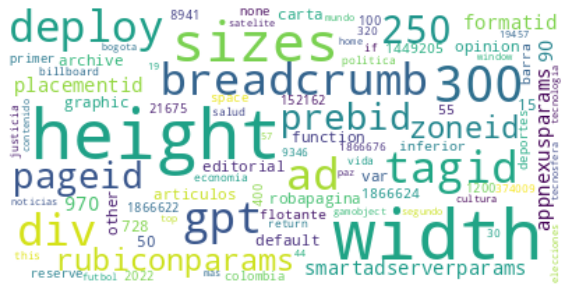

In [89]:
wordCloud= WordCloud(max_font_size=50, max_words=90, background_color='white').generate_from_frequencies(frecuencias)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud_2.jpg', bbox_inches='tight', dpi= 400)
plt.show()

# Punto 4

Defina una función de preprocesado teniendo en cuenta:

- Pasar a minúsculas

- Remover caracteres especiales

- Remover tildes

- Tokenizar

- Eliminar las stop.words (español o inglés, según sea el caso)

- Regrese la cadena de texto simplificada.

In [90]:
#libreria para detectar e identificar idiomas
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
from langdetect import detect
def Punto4(text):
    idioma = detect(text) #identificar el idioma del texto
    #pasar a minúsculas
    text= text.lower() 
    #remover tíldes
    text = text.replace('á', 'a') #remover á
    text = text.replace("é", "e") #remover é
    text = text.replace("í", "i") #remover í
    text = text.replace("ó", "o") #remover ó
    text = text.replace("ú", "u") #remover ú
    #remover caracteres especiales 
    text = re.sub("[^a-z0-9ñ]+", ' ', text) 
    #tokenizar la cadena de texto en palabras, sin signos de puntuacion
    tokens = nltk.word_tokenize(text)
    #Eliminar las stop.words (español o inglés, según sea el caso)
    if idioma == "es": #si es español
        stop_words=get_stop_words("es")
        tokens_c= [palabras for palabras in tokens if len(palabras.lower())>1 and (palabras.lower() not in stop_words)]
    elif idioma == "en": #Si es ingles
        stop_words=get_stop_words("en")
        tokens_c= [palabras for palabras in tokens if len(palabras.lower())>1 and (palabras.lower() not in stop_words)]
    #regrese la cadena de texto simplificada.    
    return ' '.join(tokens_c)


In [92]:
text
text_n= Punto4(text)
print(text_n)

gabriel garcia marquez cien años soledad editado ediciones cueva omi garcia ascot maria luisa elio años despues frente peloton fusilamiento coronel aureliano buendia habia recordar aquella tarde remota padre llevo conocer hielo macondo entonces aldea veinte casas barro cañabrava construidas orilla rio aguas diafanas precipitaban lecho piedras pulidas blancas enormes huevos prehistoricos mundo tan reciente muchas cosas carecian nombre mencionarlas habia señalarias dedo años mes marzo familia gitanos desarrapados plantaba carpa cerca aldea grande alboroto pitos timbales daban conocer nuevos inventos primero llevaron iman gitano corpulento barba montaraz manos gorrion presento nombre melquiades hizo truculenta demostracion publica mismo llamaba octava maravilla sabios alquimistas macedonia casa casa arrastrando dos lingotes metalicos mundo espanto ver calderos pailas tenazas anafes caian sitio maderas crujian desesperacion clavos tornillos tratando desenclavarse aun objetos perdidos hacia